## Problem : 63. All Nodes Distance K in Binary Tree

https://leetcode.com/problems/all-nodes-distance-k-in-binary-tree/description/

From a given tree find the all nodes which are K distance away from given Target node value.
Here, inputs are : Tree and targte node value
Output expected: value of nodes which are K distance away from Target node.

Here, distance means each link count between two nodes. 

Suppose a---b----c, here distance between a to c = 2 and a to b = 1 and b to c =1

Example 1:
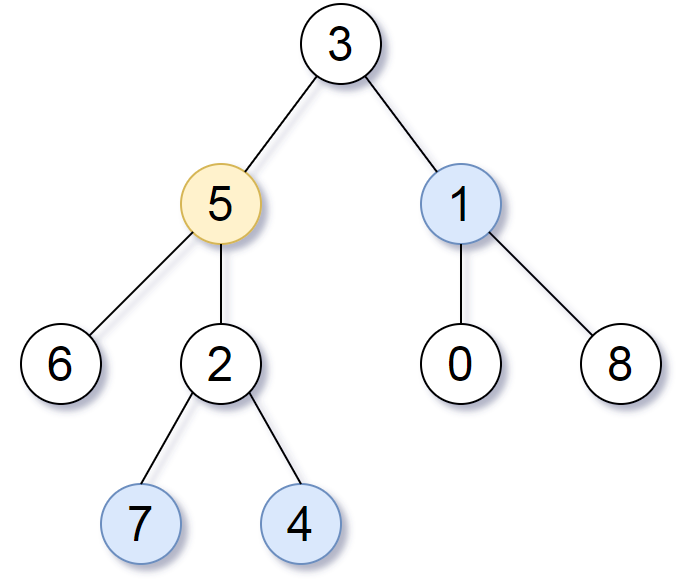

Input: root = [3,5,1,6,2,0,8,null,null,7,4], target = 5, k = 2

Output: [7,4,1]

Explanation: The nodes that are a distance 2 from the target node (with value 5) have values 7, 4, and 1.


### Approach:

First Approach:
1. Find the node, and then travels down to all nodes left and right till distance = k
2. Now, go up from node to find the nodes till distance = k
3. To go up, we must have parent information about the node. So, while finding the node in step1, better to keep the track of parents. Or Good Idea is that first visit all nodes and store parent of all nodes as an step1 and then follow other steps.

Steps:
1. Get the parent of all node. Map node value as a key and parent node as a value
2. Find the target node and parent from the populated map
3. Add leftnode, rightnode and parentNode in a queue and check the distacne, if diatnce is K then add in the kth distance list and return, if not then repeat the same by increasing distance by 1.
4. Make sure that do not visit the node twice.

In [57]:
import queue

In [58]:
def findNodesDistanceK(tree, target, k):
    nodeParentMap = {}
    populateParent(tree, nodeParentMap)
    targetNode = findNode(tree, target, nodeParentMap)
    kDistanceNodes = findKDistanceNodes(targetNode, k, nodeParentMap)
    return kDistanceNodes

def populateParent(tree, nodeParentMap, parent = None):
    if tree:
        nodeParentMap[tree.data] = parent
        populateParent(tree.left, nodeParentMap, tree)
        populateParent(tree.right, nodeParentMap, tree)
        
def findNode(tree, target, nodeParentMap):
    if tree.data == target:
        return tree
    parent = nodeParentMap[target]
    if parent.left is not None and parent.left.data == target:
        return parent.left
    else:
        return parent.right
    
def findKDistanceNodes(targetNode, k, nodeParentMap):
    
    Q = queue.Queue()
    Q.put((targetNode, 0))
    visited = [targetNode.data]
    while Q.empty() is not True:
        node, distance = Q.get()
        if distance == k:
            # Got the nodes with K distance from target node
            # now, retrive all data from Queue and return
            kDistanceNodes = []
            while Q.empty() is not True:
                n, _ = Q.get()
                kDistanceNodes.append(n.data)
            kDistanceNodes.append(node.data)
            return kDistanceNodes
        if node.left is not None and node.left.data not in visited:
            Q.put((node.left, distance+1))
            visited.append(node.left.data)
        if node.right is not None and node.right.data not in visited:
            Q.put((node.right, distance+1))
            visited.append(node.right.data)
        parent = nodeParentMap[node.data]
        if parent is not None and parent.data not in visited:
            Q.put((parent, distance+1))
            visited.append(parent.data)
    

In [59]:
# Binary Tree
class BinaryTree:
    def __init__(self, data,left=None, right=None):
        self.left = left
        self.right = right
        self.data = data
        
    def insert(self, data):
        root = self
        if root is None:
            root = BinaryTree(data)
            return
        Q = queue.Queue()
        Q.put(root)
        while Q.empty() is not True:
            root = Q.get()
            if root.left is None:
                root.left = BinaryTree(data)
                return
            else:
                Q.put(root.left)
            if root.right is None:
                root.right = BinaryTree(data)
                return
            else:
                Q.put(root.right)
def inorder(tree):
    if tree:
        inorder(tree.left)
        print(tree.data)
        inorder(tree.right)
def preorder(tree):
    if tree:
        print(tree.data)
        preorder(tree.left)
        preorder(tree.right)
def postorder(tree):
    if tree:
        postorder(tree.left)
        postorder(tree.right)
        print(tree.data)

In [60]:
bt = BinaryTree(1)
bt.insert(2)
bt.insert(7)
bt.insert(4)
bt.insert(5)
bt.insert(3)
bt.insert(8)
bt.insert(6)
print("*****inorder*********\n")
inorder(bt)
print("*****preorder*********\n")
preorder(bt)
print("*****postorder*********\n")
postorder(bt)

*****inorder*********

6
4
2
5
1
3
7
8
*****preorder*********

1
2
4
6
5
7
3
8
*****postorder*********

6
4
5
2
3
8
7
1


In [61]:
print(findNodesDistanceK(bt, 5,2))

[1, 4]


In [62]:
print(findNodesDistanceK(bt, 5,3))

[7, 6]


In [63]:
print(findNodesDistanceK(bt, 3,3))

[2]


In [64]:
print(findNodesDistanceK(bt, 7,3))

[5, 4]


In [65]:
print(findNodesDistanceK(bt, 4,2))

[1, 5]


### Approach 2

Start from root node and keep the distance trevelled. Once find the node, travels down to all nodes left and right till distance = k. Then go up to find nodes having distance k. Distance calculation will be done with the help of keeping distance.

Steps:
1. Start from root node, go to left and then right recursively. Return 1, if node is found otherwise -1
2. If node is found then find other child nodes having distance of value K and insert those nodes in the nodelist (result). Starting distance would be 0, if node is target node
3. Go up with increase distance by 1, and then traverse to child nodes till distance = k. Insert nodes in the nodelist (result).

In [68]:
def findNodesDistanceK2(tree, target, k):
    kDistanceNodeList = []
    findNodes(tree, target, k, kDistanceNodeList)
    return kDistanceNodeList

def findNodes(node, target, k, kDistanceNodeList):
    if node is None:
        return -1
    
    if node.data == target:
        findKNodes(node, 0, k, kDistanceNodeList)
        return 1
    
    leftDistance = findNodes(node.left, target, k, kDistanceNodeList)
    rightDistance = findNodes(node.right, target, k, kDistanceNodeList)
    
    if leftDistance == k or rightDistance == k:
        kDistanceNodeList.append(node.data)
    
    if leftDistance != -1:
        findKNodes(node.right, leftDistance + 1, k, kDistanceNodeList)
        return leftDistance + 1
    
    if rightDistance != -1:
        findKNodes(node.left, rightDistance + 1, k, kDistanceNodeList)
        return rightDistance + 1
    
    return -1

def findKNodes(node, distance, k, kDistanceNodeList):
    if node is None:
        return
    if distance == k:
        kDistanceNodeList.append(node.data)
        
    findKNodes(node.left, distance + 1, k, kDistanceNodeList)
    findKNodes(node.right, distance + 1, k, kDistanceNodeList)

In [69]:
print(findNodesDistanceK2(bt, 5,2))

[4, 1]


In [70]:
print(findNodesDistanceK2(bt, 5,3))

[6, 7]


In [71]:
print(findNodesDistanceK(bt, 3,3))

[2]


In [72]:
print(findNodesDistanceK(bt, 7,3))

[4, 5]


In [73]:
print(findNodesDistanceK(bt, 4,2))

[5, 1]
